# Running the RNN LSTM + Dense Network Model

In [1]:
import pandas as pd

import sys
import os
project_root = os.path.abspath("..")  # Add the project root to the Python path
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    sys.path.append(os.path.abspath('../src/'))

from src.data_preprocessing import DataPreprocessor 
from src.feature_engineering import FeatureEngineering


In [2]:

# Test the preprocessing
file_path = (
    "../data/raw/financial_regression.csv"  # Adjust the path based on your directory structure
)

In [3]:
# Creating an instance of the DataPreprocessor class
dp = DataPreprocessor(file_path=file_path)
# Calling the preprocess method which which will perform all the preprocessing steps
df_preprocess = dp.preprocess()
df_preprocess.head(5)

Data has been loaded
No null values found


,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume,days_since_start
0,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,46.39,...,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0,0
1,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,45.85,...,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0,1
3,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,46.59,...,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0,5
4,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,45.92,...,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0,6
5,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.350,45.30,45.49,...,45.07,45.30,388457.0,1.91,108.48,108.78,106.61,107.37,25747831.0,7


In [4]:
from src.train_model import split_train_test
X_train, X_test, y_train, y_test =split_train_test(df_preprocess, 'gold close', test_size=0.3)

In [5]:
# Creating an instance of the feature engineering class
fe = FeatureEngineering(X_train, X_test, y_train, y_test)
fe.scale_data()

In [ ]:
from src.model import GoldPricePredictionModel
# Usage example:
model = GoldPricePredictionModel(fe.X_train_scaled, fe.X_test_scaled, fe.y_train_scaled, fe.y_test_scaled, scaler_y=fe.scaler_y)

In [7]:
model.build_model()  # Building the model

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_input (InputLayer)         │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_layer (LSTM)              │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_layer (LSTM)             │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.train_model()  # Training the model

Epoch 1/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0669 - val_loss: 0.0393
Epoch 2/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0477 - val_loss: 0.0761
Epoch 3/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0453 - val_loss: 0.2032
Epoch 4/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0474 - val_loss: 0.1079
Epoch 5/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0401 - val_loss: 0.1678
Epoch 6/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - val_loss: 0.1151
Epoch 7/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - val_loss: 0.0621
Epoch 8/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - val_loss: 0.0823
Epoch 9/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - val_loss: 0.0660
Epoch 10/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - val_loss: 0.0673
Epoch 11/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - val_loss: 0.0716
Epoch 12/200
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.

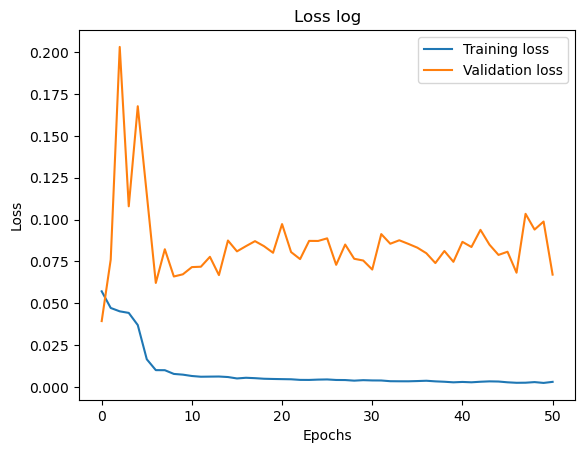

In [9]:
model.plot_loss()  # Plotting the training loss

In [10]:

model.predict()  # Making predictions

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


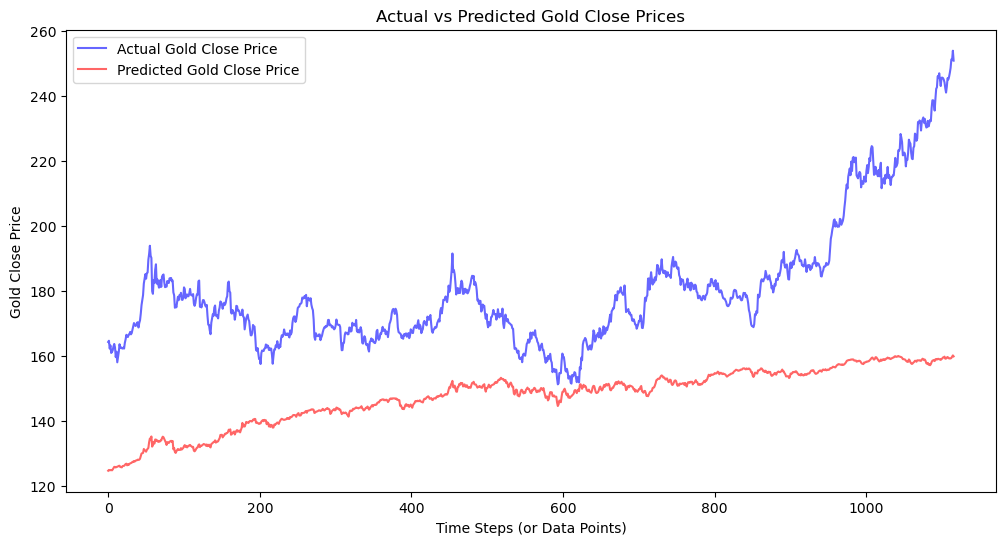

In [11]:
model.plot_actual_vs_predicted()  # Plotting actual vs predicted values


In [12]:
model.evaluate_model()  # Evaluating model performance

Mean Squared Error (MSE): 1371.0431239788766
Mean Absolute Error (MAE): 33.04097452936207
R-squared: -2.4458107924706365
